# Домашнее задание "Временные ряды, общая теория"

In [ ]:
Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Возьмем первый ряд и приведем его к стационарному

In [3]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")

In [4]:
sales_of_company_x.head()

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36


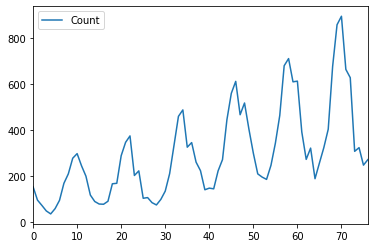

In [5]:
sales_of_company_x.plot()

In [6]:
X = sales_of_company_x.Count
X.head()

0    154
1     96
2     73
3     49
4     36
Name: Count, dtype: int64

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
dftest = adfuller(X, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
dtype: float64

In [9]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [10]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

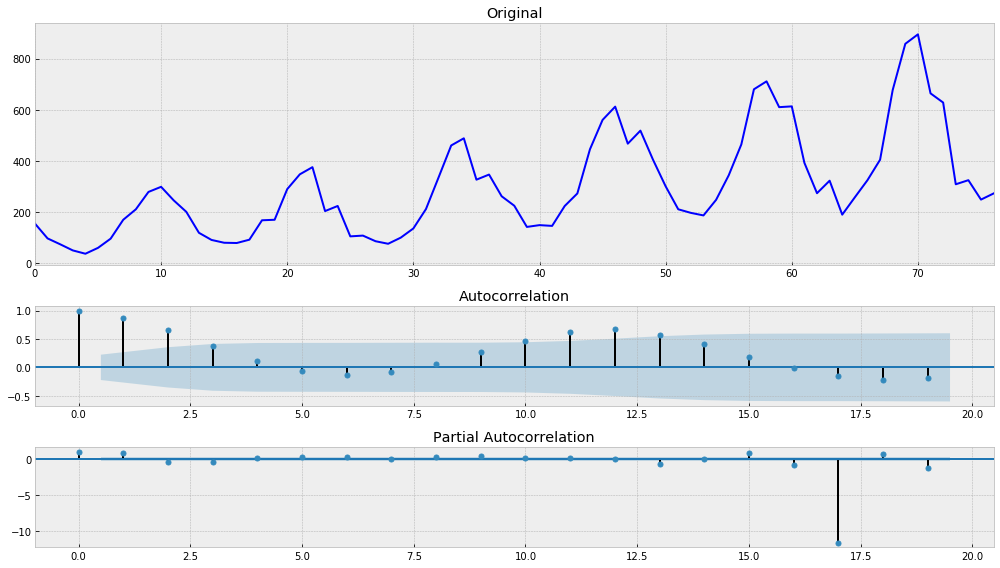

In [11]:
tsplot(X)

In [ ]:
Исходя из значений p-value теста Дики-Фуллера и графиков коррелограмм, можно сделать вывод, что ряд нестационарен. 
Для приведения к стационарности сначала используем метод Бокса-Кокса, чтобы убрать размах дисперсии

In [12]:
from scipy.stats import boxcox

In [13]:
X = boxcox(X, 0)

In [14]:
dftest = adfuller(X, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
dtype: float64

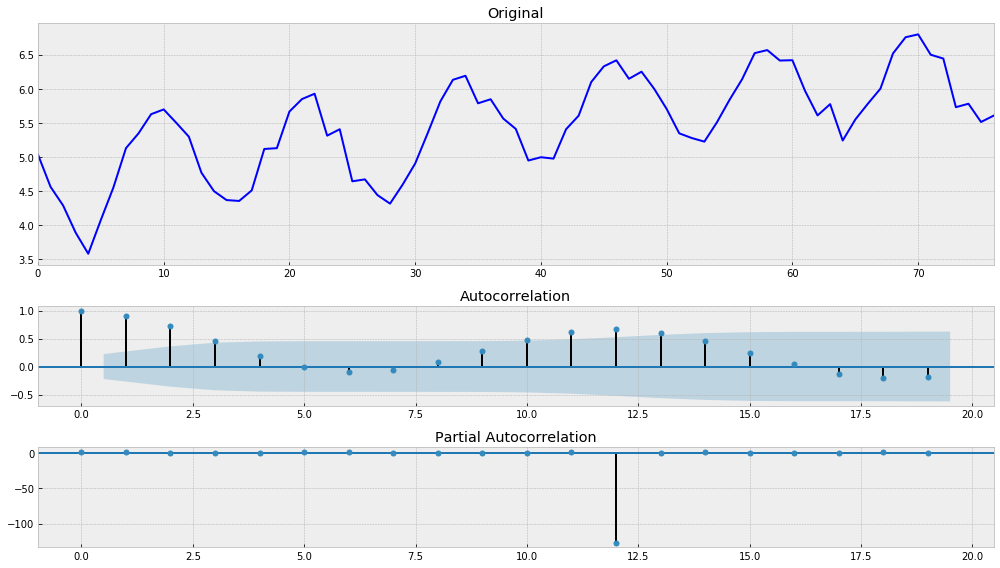

In [15]:
tsplot(X)

In [ ]:
Метод Бокса-Кокса не очень помог, ряд все еще нестационарен
Воспользуемся методом дифференцирования

In [16]:
import numpy as np

In [17]:
X_new = np.diff(X, 1)

In [18]:
dftest = adfuller(X_new, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
dtype: float64

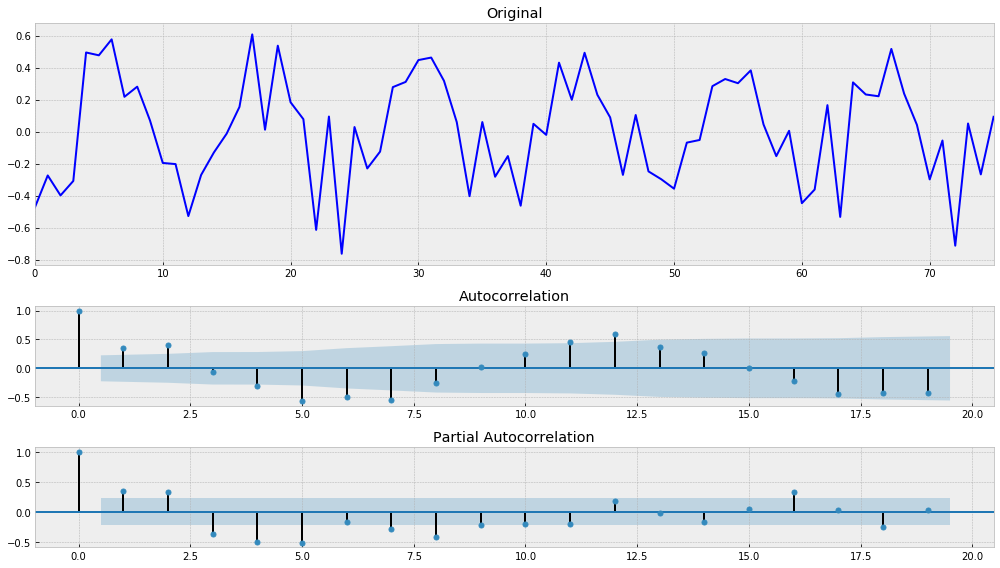

In [19]:
tsplot(X_new)

In [ ]:
Интересно, что p-value < 0.05, но при этом сезонность осталась.
Продифференцируем еще раз. 

In [20]:
X = np.diff(X, 2)

In [21]:
dftest = adfuller(X, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

Test Statistic                -7.101182e+00
p-value                        4.164137e-10
#Lags Used                     1.100000e+01
Number of Observations Used    6.300000e+01
dtype: float64

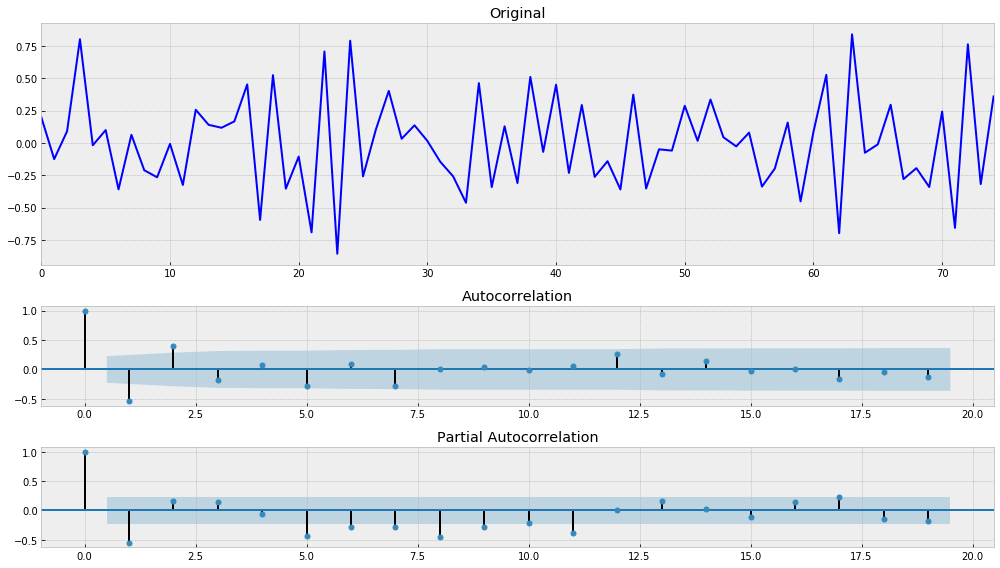

In [22]:
tsplot(X)

In [ ]:
Значение p-value < 0.05 и ушла сезонность, то есть можем говорить о том, что ряд стационарен.

In [ ]:
Приведем еще один ряд к стационарности

In [23]:
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")

In [24]:
dowjones_closing.head()

,Week,Close
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43


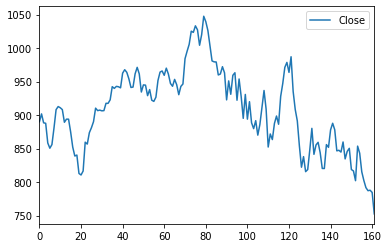

In [25]:
dowjones_closing.plot()

In [26]:
D = dowjones_closing.Close
D.head()

0    890.19
1    901.80
2    888.51
3    887.78
4    858.43
Name: Close, dtype: float64

In [28]:
dftest = adfuller(D, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
dtype: float64

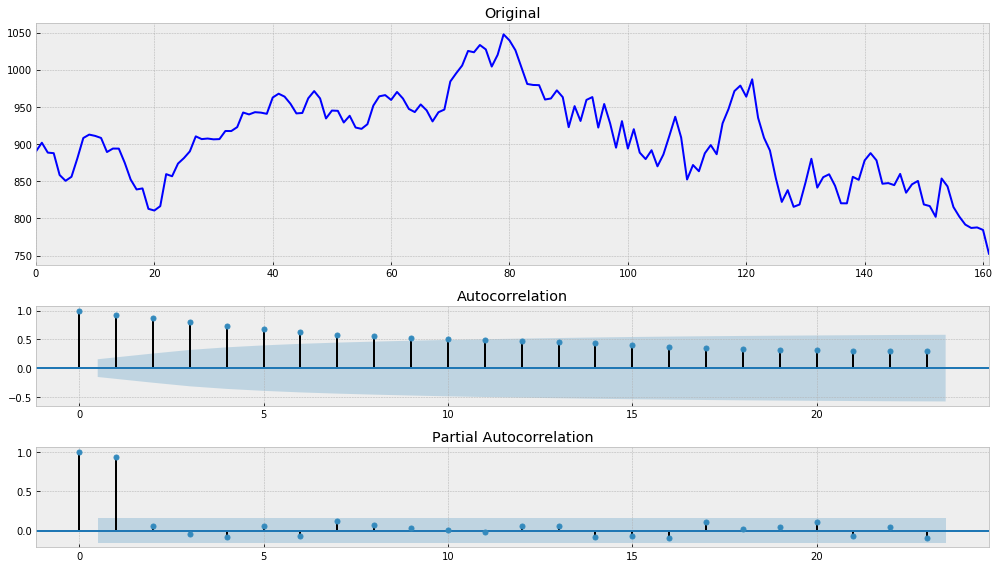

In [29]:
tsplot(D)

In [30]:
D = np.diff(D, 1)

In [31]:
dftest = adfuller(D, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
dtype: float64

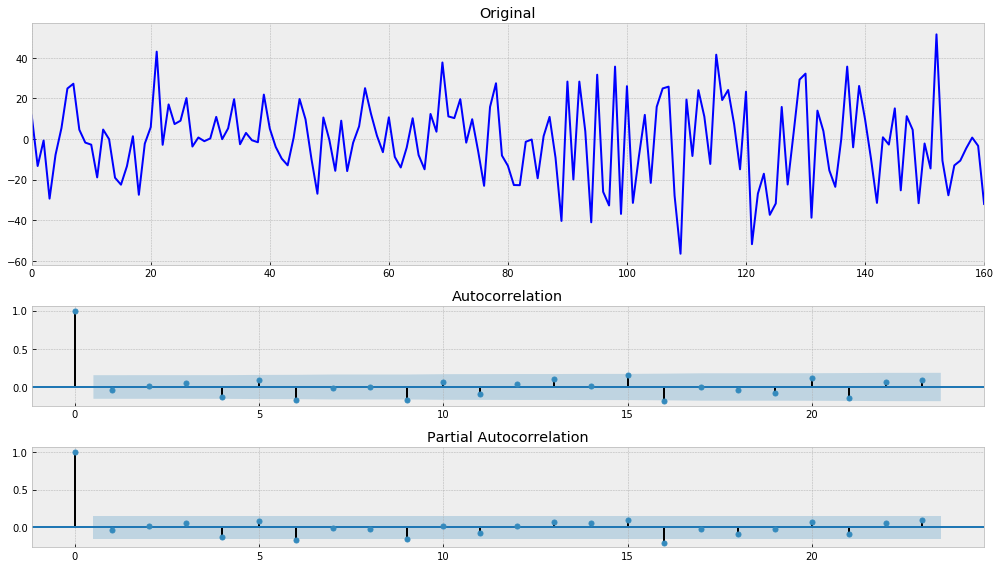

In [32]:
tsplot(D)

In [ ]:
Значение p-value < 0.05, ряд стал стационарным.

In [ ]:
Рассмотрим еще один ряд

In [33]:
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

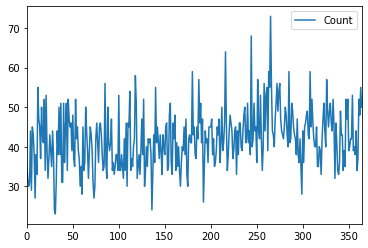

In [34]:
female_births.plot()

In [35]:
F = female_births.Count
F.head()

0    35
1    32
2    30
3    31
4    44
Name: Count, dtype: int64

In [36]:
dftest = adfuller(F, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
dtype: float64

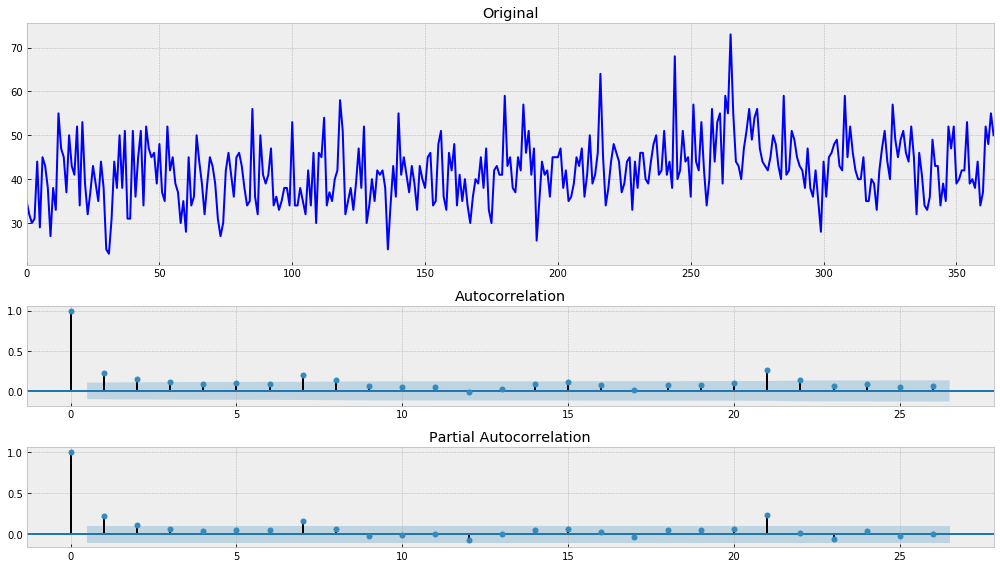

In [37]:
tsplot(F)

In [ ]:
Наш ряд оказался изначально стационарным, никаких доп. преобразований не требуется.  